In [1]:
# template.py
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import RZGate, RZZGate
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.5
beta  = 0.1
n_qubits = 5

trotter_steps = 10
T = 1.0

qr = QuantumRegister(n_qubits)
cr = ClassicalRegister(n_qubits)
qc = QuantumCircuit(qr, cr)

for i in range(n_qubits):
    qc.h(i)

for step in range(trotter_steps):
    qc.rzz(-2 * gamma * 0.25 * (T / trotter_steps), 0, 3)
    qc.rzz(-2 * gamma * 0.25 * (T / trotter_steps), 1, 3)
    qc.rzz(-2 * gamma * 0.25 * (T / trotter_steps), 2, 3)
    qc.rzz(-2 * gamma * 0.25 * (T / trotter_steps), 0, 4)
    qc.rzz(-2 * gamma * 0.25 * (T / trotter_steps), 1, 4)
    qc.rzz(-2 * gamma * 0.25 * (T / trotter_steps), 2, 4)

    for i in range(n_qubits):
        qc.rx(2 * beta, i)

qc.measure(range(n_qubits), range(n_qubits))

simulator = BasicSimulator()

compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

print(result.get_counts())


{'11111': 27, '01110': 28, '11001': 31, '00100': 25, '10100': 38, '00010': 37, '01000': 27, '11000': 60, '00001': 28, '10001': 31, '01111': 37, '01011': 30, '00011': 36, '11110': 27, '10010': 26, '11100': 28, '01001': 32, '00000': 20, '10111': 40, '00110': 44, '10011': 30, '11101': 28, '10000': 29, '00111': 58, '01100': 29, '10110': 25, '11010': 35, '01010': 20, '01101': 28, '11011': 27, '00101': 38, '10101': 25}


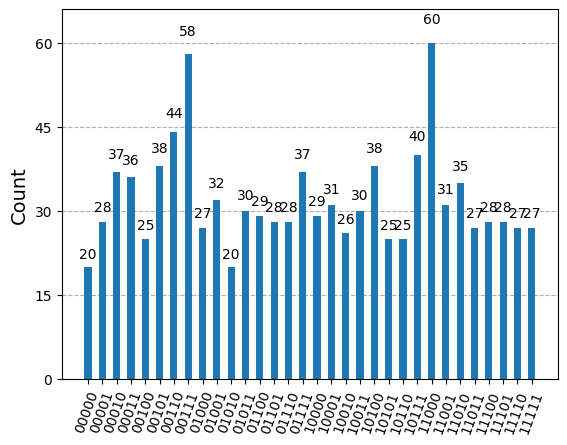

In [2]:
plot_histogram(result.get_counts())